In [14]:
#importing the necessary libraries for the models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import tensorflow_decision_forests as tfdf


In [16]:
#checking the version of the  tensorflow
print("TensorFlow v" + tf.__version__)

TensorFlow v2.12.0


In [18]:
#Loading  the dataset into the varible
train_data = pd.read_csv("/content/drive/MyDrive/AdvancedRegression/train.csv")
train_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [20]:
#EDA of the  datasets
train_data.shape

(1460, 81)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:

train_data.isnull().sum().sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [36]:
train_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id','LotFrontage'],inplace=True) # removing the unwanted features for the model

In [37]:
train_data.shape

(1460, 74)

<h1> Graphs Viasualizations

<ipython-input-42-0a94fcc13ac0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data.SalePrice,color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

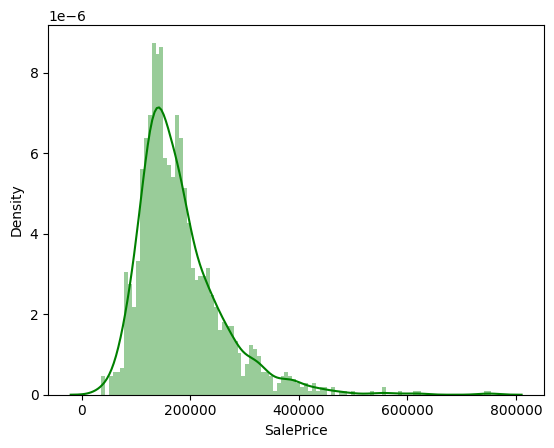

In [42]:
#lets see the distribution of the target value
sns.distplot(train_data.SalePrice,color='g', bins=100, hist_kws={'alpha': 0.4})

In [51]:
set(train_data.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [54]:
numeric_data_columns = train_data.select_dtypes(include=['float64','int64'])
numeric_data_columns.head(3)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500


In [56]:
print("this many features are the numeric values", numeric_data_columns.shape[1],"out of 81")

this many features are the numeric values 36 out of 81


<Figure size 50000x50000 with 0 Axes>

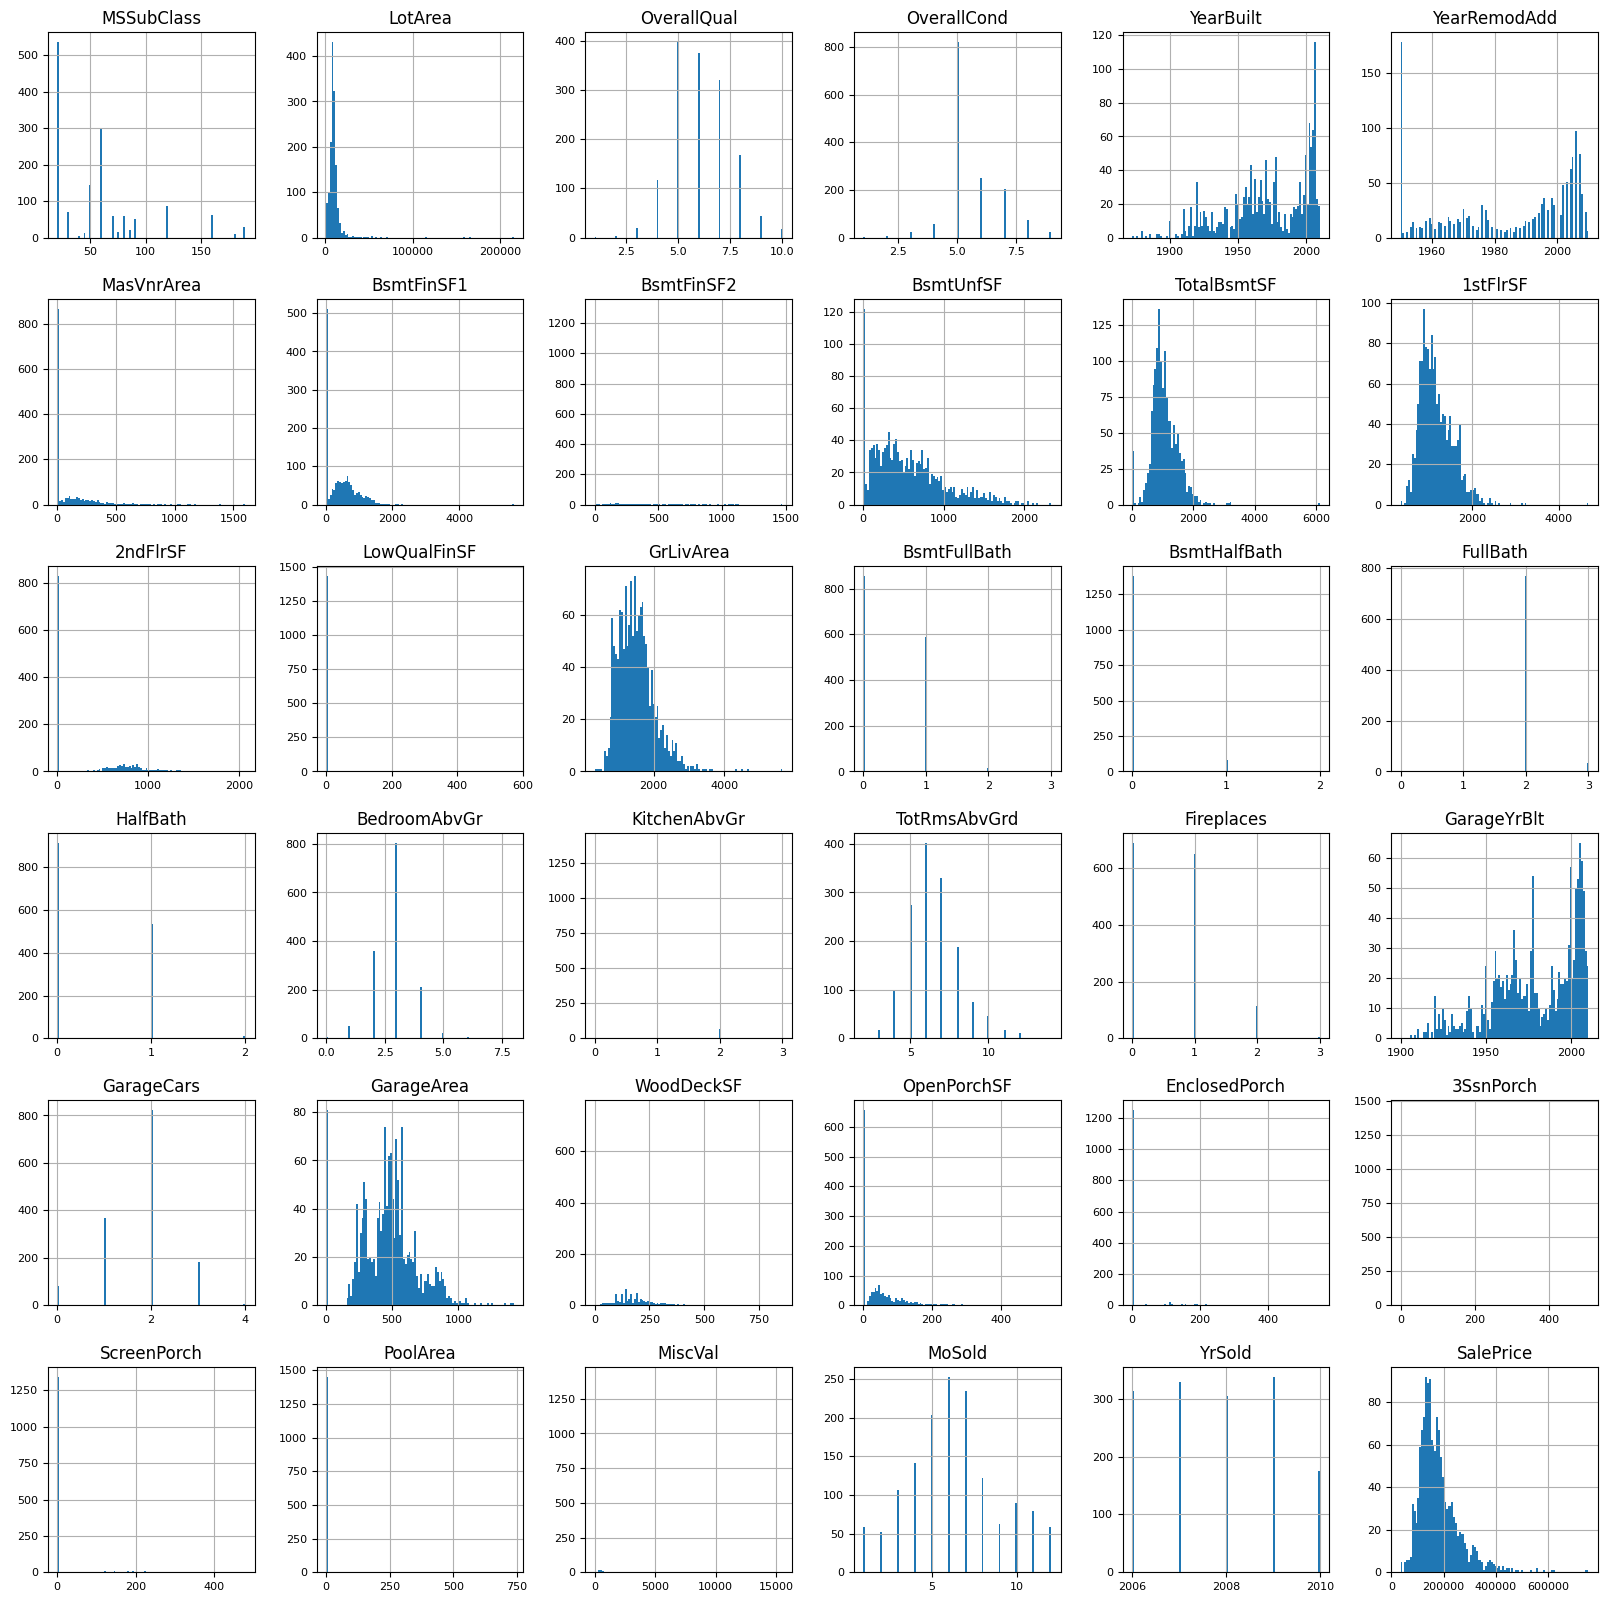

In [60]:
# lets see all the distrubtion of the numeric varaibles in the data sets

numeric_data_columns.hist(bins=100,figsize=(20,20),xlabelsize=8,ylabelsize=8);
plt.show()

In [69]:
#the mmain features of the Tress based algorithm can handle all types of the variables there fore no need for futher feature scaling
# lets split the data into train and test
pd.set_option('display.max_rows',20)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)
print("this many samples used for ",X_train.shape[0],"this many samples used for test", X_test.shape[0])
#this is role since the the method we are using is the unsupervised algorithm hereforth we no need to pass the label parameters

this many samples used for  1022 this many samples used for test 438


In [73]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_data_df, test_data_df = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_data_df), len(test_data_df)))

996 examples in training, 464 examples in testing.


In [74]:
label = 'SalePrice'
from tensorflow import keras
train_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_data_df,label=label,task= tfdf.keras.Task.REGRESSION)
test_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_data_df,label=label,task=tfdf.keras.Task.REGRESSION)


In [75]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [86]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse","accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpf0h7jjix as temporary training directory


In [87]:
rf.fit(x=train_data_tf)

Reading training dataset...
Training dataset read in 0:00:00.634752. Found 996 examples.
Training model...
Model trained in 0:00:02.550016
Compiling model...
Model compiled.


In [88]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

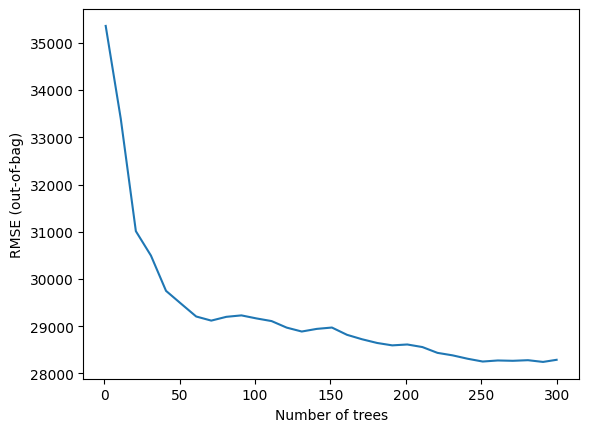

In [89]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show() # when the tree range is 50 its

In [90]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=996, accuracy=None, loss=None, rmse=28288.191098359846, ndcg=None, aucs=None, auuc=None, qini=None)

In [92]:
evaluation = rf.evaluate(x=test_data_tf,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 593ms/step - loss: 0.0000e+00 - mse: 990383680.0000 - accuracy: 0.0000e+00
loss: 0.0000
mse: 990383680.0000
accuracy: 0.0000


In [93]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH


In [94]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #57), 99.0),
 ("ExterQual" (4; #21), 68.0),
 ("Neighborhood" (4; #54), 40.0),
 ("GrLivArea" (1; #35), 23.0),
 ("GarageCars" (1; #29), 20.0),
 ("YearBuilt" (1; #70), 15.0),
 ("KitchenQual" (4; #41), 11.0),
 ("TotalBsmtSF" (1; #67), 11.0),
 ("BsmtQual" (4; #13), 5.0),
 ("FullBath" (1; #26), 3.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("GarageFinish" (4; #31), 2.0),
 ("GarageArea" (1; #28), 1.0)]

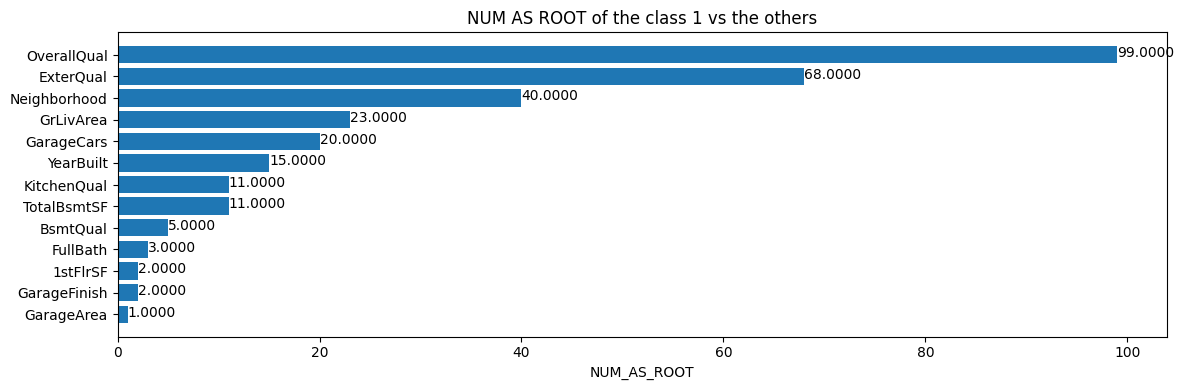

In [95]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()
